In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
# Korelasyon matrisini hesapla
corr_matrix = df.corr()

# "price" ile olan korelasyonları sırala ve eşik değeri (0.2) altında olanları filtrele
low_corr_features = corr_matrix[abs(corr_matrix["price"]) < 0.2].index

# Veriyi temizle ve ilgili sütunları çıkart
cleaned_df = df.drop(low_corr_features, axis=1)


C:\Users\tkaan\AppData\Local\Temp\ipykernel_17296\2313943838.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [4]:
cleaned_df

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,20150225T000000,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,47.6993,1530
21609,20150223T000000,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,47.5107,1830
21610,20140623T000000,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,47.5944,1020
21611,20150116T000000,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,47.5345,1410


In [5]:
cleaned_df = cleaned_df.drop("date", axis=1)

In [6]:
cleaned_df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,47.5345,1410


In [7]:
cleaned_df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,0.007542,0.234303,7.656873,1788.390691,291.509045,47.560053,1986.552492
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,0.086517,0.766318,1.175459,828.090978,442.575043,0.138564,685.391304
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,47.155900,399.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,47.471000,1490.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,47.571800,1840.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,8.000000,2210.000000,560.000000,47.678000,2360.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,47.777600,6210.000000


In [9]:
cleaned_df.shape

(21613, 12)

In [10]:
cleaned_df = cleaned_df[cleaned_df['bedrooms'] < 7]

In [11]:
cleaned_df.shape

(21551, 12)

In [12]:
cleaned_df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
count,2.155100e+04,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000
mean,5.388814e+05,3.357431,2.110331,2074.802237,1.493573,0.007563,0.233864,7.655236,1785.039581,289.762656,47.559886,1985.768224
std,3.649685e+05,0.879087,0.763482,910.036434,0.539801,0.086641,0.765719,1.174130,823.582445,439.884377,0.138654,684.758152
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,47.155900,399.000000
25%,3.210000e+05,3.000000,1.500000,1420.000000,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,47.470300,1490.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,47.571600,1840.000000
75%,6.430000e+05,4.000000,2.500000,2540.000000,2.000000,0.000000,0.000000,8.000000,2210.000000,560.000000,47.678000,2360.000000
max,7.700000e+06,6.000000,8.000000,12050.000000,3.500000,1.000000,4.000000,13.000000,8860.000000,4820.000000,47.777600,6210.000000


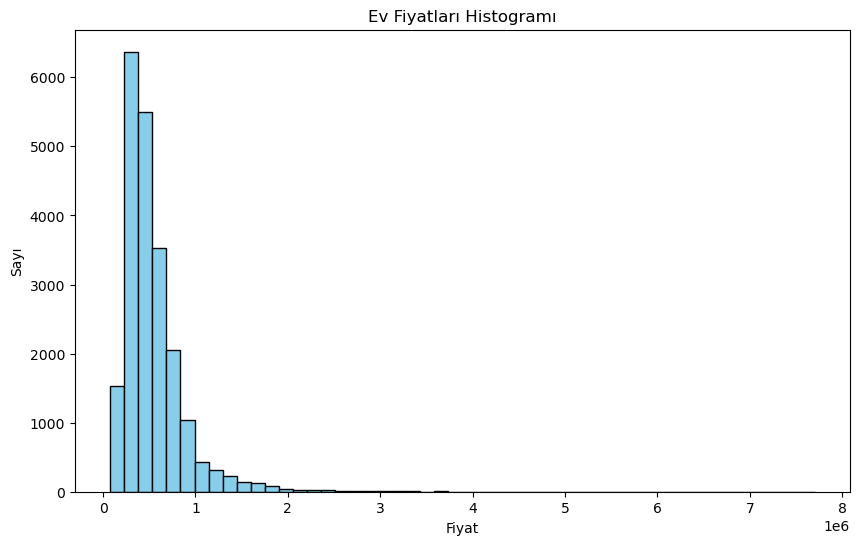

In [13]:
import matplotlib.pyplot as plt

# Fiyatları histogram olarak çizelim
plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Ev Fiyatları Histogramı')
plt.xlabel('Fiyat')
plt.ylabel('Sayı')
plt.show()


In [19]:
# 1.7 milyon dolardan yüksek fiyatlı evlerin sayısı
expensive_homes = len(cleaned_df[cleaned_df['price'] > 1700000])

print(f'1.7 milyon dolardan daha yüksek fiyatlı evlerin sayısı: {expensive_homes}')

1.7 milyon dolardan daha yüksek fiyatlı evlerin sayısı: 337


In [20]:
cleaned_df = cleaned_df[cleaned_df['price'] <= 1700000]

In [21]:
cleaned_df.shape

(21214, 12)

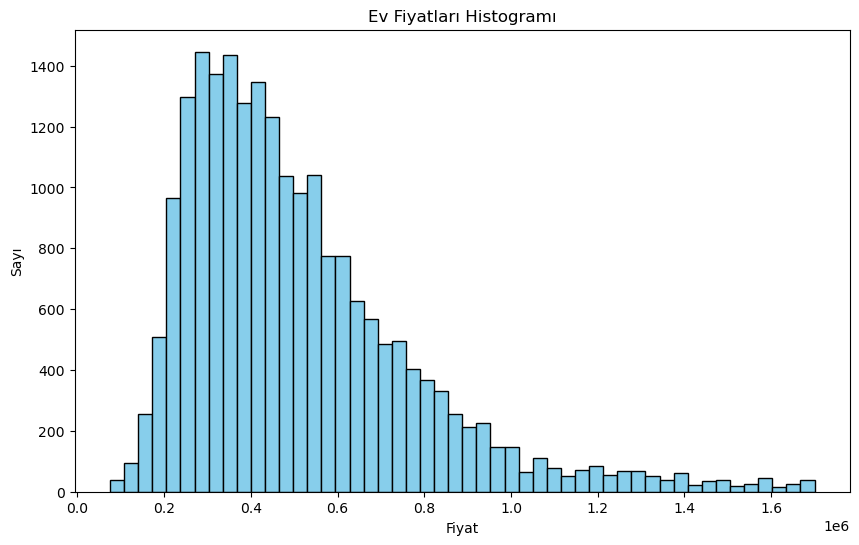

In [22]:
import matplotlib.pyplot as plt

# Fiyatları histogram olarak çizelim
plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Ev Fiyatları Histogramı')
plt.xlabel('Fiyat')
plt.ylabel('Sayı')
plt.show()

In [23]:
# Bağımsız değişkenler (x)
x = cleaned_df.drop('price', axis=1)

# Bağımlı değişken (y)
y = cleaned_df['price']

In [24]:
from sklearn.model_selection import train_test_split

# Verileri eğitim ve test veri setlerine bölelim (örneğin, %80 eğitim, %20 test olarak)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression

# Lineer Regresyon modelini oluşturun ve lr değişkenine atayın
lr = LinearRegression()

# Modeli eğitin
lr.fit(x_train, y_train)

LinearRegression()

In [26]:
# Test veri seti üzerinde tahminler yapın
tahmin = lr.predict(x_test)

In [27]:
from sklearn.metrics import r2_score, mean_squared_error

# R-kare (R2) skoru
r2 = r2_score(y_test, tahmin)
print(f'R-kare (R2) Skoru: {r2}')

# Ortalama Kare Hata (MSE)
mse = mean_squared_error(y_test, tahmin)
print(f'Ortalama Kare Hata (MSE): {mse}')

R-kare (R2) Skoru: 0.6616642024207183
Ortalama Kare Hata (MSE): 23783798273.16387


In [31]:
(mean_squared_error(y_test,tahmin))**.5

154219.9671675619

In [30]:
r2_score(y_test, tahmin)

0.6616642024207183

In [33]:
cleaned_df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
count,2.121400e+04,21214.000000,21214.000000,21214.000000,21214.000000,21214.000000,21214.000000,21214.000000,21214.000000,21214.000000,21214.000000,21214.00000
mean,5.096754e+05,3.344065,2.086429,2034.243613,1.487838,0.004714,0.209296,7.610634,1753.675639,280.567974,47.558954,1963.28500
std,2.660614e+05,0.873665,0.735284,840.674992,0.539024,0.068497,0.715465,1.118910,776.232643,424.953015,0.139395,658.23629
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,47.155900,399.00000
25%,3.200000e+05,3.000000,1.500000,1410.000000,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,47.467200,1480.00000
50%,4.470000e+05,3.000000,2.250000,1890.000000,1.500000,0.000000,0.000000,7.000000,1550.000000,0.000000,47.569900,1830.00000
75%,6.300000e+05,4.000000,2.500000,2506.000000,2.000000,0.000000,0.000000,8.000000,2170.000000,540.000000,47.678600,2330.00000
max,1.700000e+06,6.000000,6.500000,7620.000000,3.500000,1.000000,4.000000,12.000000,7320.000000,2850.000000,47.777600,5790.00000


In [56]:
# bedrooms sütununda değeri 6 olan satırları filtrele ve çıkar
cleaned_df = cleaned_df[cleaned_df['bedrooms'] < 10]

In [57]:
cleaned_df = cleaned_df[cleaned_df['price'] <= 1600000]

In [48]:
cleaned_df.drop('view', axis=1, inplace=True)

KeyError: "['view'] not found in axis"

In [58]:
cleaned_df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,sqft_above,sqft_basement,lat,sqft_living15,view
count,2.088300e+04,20883.000000,20883.000000,20883.000000,20883.000000,20883.000000,20883.000000,20883.000000,20883.000000,20883.000000,20883.000000,20883.000000
mean,5.034769e+05,3.309199,2.071314,2014.018532,1.485299,0.004262,7.598046,1740.665996,273.352536,47.558548,1956.230427,0.201839
std,2.558272e+05,0.827425,0.722096,821.440929,0.538726,0.065145,1.107912,764.774181,416.518217,0.139749,652.745176,0.700208
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,1.000000,290.000000,0.000000,47.155900,399.000000,0.000000
25%,3.190000e+05,3.000000,1.500000,1410.000000,1.000000,0.000000,7.000000,1180.000000,0.000000,47.465800,1480.000000,0.000000
50%,4.450000e+05,3.000000,2.250000,1880.000000,1.000000,0.000000,7.000000,1540.000000,0.000000,47.569400,1820.000000,0.000000
75%,6.250000e+05,4.000000,2.500000,2480.000000,2.000000,0.000000,8.000000,2150.000000,530.000000,47.678800,2320.000000,0.000000
max,1.600000e+06,5.000000,6.000000,7350.000000,3.500000,1.000000,12.000000,7320.000000,2810.000000,47.777600,5790.000000,4.000000


In [59]:
# x2 ve y2'yi tanımlayalım
x2 = cleaned_df.drop('price', axis=1)  # Bağımsız değişkenler
y2 = cleaned_df['price']  # Bağımlı değişken

In [60]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Lineer Regresyon modelini oluşturun ve eğitin
lr2 = LinearRegression()
lr2.fit(x2_train, y2_train)

# Test veri seti üzerinde tahminler yapın
y2_pred = lr2.predict(x2_test)

# R-kare (R2) skoru
r2_2 = r2_score(y2_test, y2_pred)
print(f'R-kare (R2) Skoru: {r2_2}')

# Ortalama Kare Hata (MSE)
mse_2 = mean_squared_error(y2_test, y2_pred)
print(f'Ortalama Kare Hata (MSE): {mse_2}')

R-kare (R2) Skoru: 0.651057478601966
Ortalama Kare Hata (MSE): 23176208798.129498


In [63]:
r2_score(y2_test, y2_pred)

0.651057478601966

In [62]:
(mean_squared_error(y2_test,y2_pred))**.5

152237.34363857476

In [55]:
cleaned_df['view'] = df['view']

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Veri setinizi küçük "x3" ve "y3" olarak ayırın
x3 = cleaned_df.drop(columns=['price'])  # Bağımsız değişkenler
y3 = cleaned_df['price']  # Bağımlı değişken

# Eğitim ve test veri setlerini ayırın
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

# Ridge Regresyon modelini oluşturun
ridge = Ridge()

# Hiperparametre aralıklarını belirleyin
param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000],  # Çeşitli alpha değerleri deneyebilirsiniz
}

# GridSearchCV ile hiperparametre ayarlaması yapın
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x3_train, y3_train)

# En iyi parametreleri ve skoru görüntüleyin
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", -grid_search.best_score_)

# Test verisi üzerinde modeli değerlendirin
y3_pred = grid_search.predict(x3_test)

from sklearn.metrics import r2_score, mean_squared_error

# R-kare (R2) skoru
r2 = r2_score(y3_test, y3_pred)
print(f'R-kare (R2) Skoru: {r2}')

# Ortalama Kare Hata (MSE)
mse = mean_squared_error(y3_test, y3_pred)
print(f'Ortalama Kare Hata (MSE): {mse}')


En iyi parametreler: {'alpha': 0.1}
En iyi skor: 22010972939.06683
R-kare (R2) Skoru: 0.651131407178784
Ortalama Kare Hata (MSE): 23171298579.318626


In [65]:
# cleaned_df veri çerçevesindeki tüm kolonları alarak yeni bir x4 veri çerçevesi oluşturun
x4 = cleaned_df.copy()

# Yeni özellikleri ekleyin
x4['total_rooms'] = x4['bedrooms'] + x4['bathrooms']
x4['total_sqft'] = x4['sqft_living'] + x4['sqft_above'] + x4['sqft_basement']
x4['avg_room_size'] = x4['sqft_living'] / x4['bedrooms']


In [66]:
x4

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,sqft_above,sqft_basement,lat,sqft_living15,view,total_rooms,total_sqft,avg_room_size
0,221900.0,3,1.00,1180,1.0,0,7,1180,0,47.5112,1340,0,4.00,2360,393.333333
1,538000.0,3,2.25,2570,2.0,0,7,2170,400,47.7210,1690,0,5.25,5140,856.666667
2,180000.0,2,1.00,770,1.0,0,6,770,0,47.7379,2720,0,3.00,1540,385.000000
3,604000.0,4,3.00,1960,1.0,0,7,1050,910,47.5208,1360,0,7.00,3920,490.000000
4,510000.0,3,2.00,1680,1.0,0,8,1680,0,47.6168,1800,0,5.00,3360,560.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,8,1530,0,47.6993,1530,0,5.50,3060,510.000000
21609,400000.0,4,2.50,2310,2.0,0,8,2310,0,47.5107,1830,0,6.50,4620,577.500000
21610,402101.0,2,0.75,1020,2.0,0,7,1020,0,47.5944,1020,0,2.75,2040,510.000000
21611,400000.0,3,2.50,1600,2.0,0,8,1600,0,47.5345,1410,0,5.50,3200,533.333333


In [67]:
y4 = cleaned_df['price']


In [68]:
x4 = x4.drop('price', axis=1)


In [70]:
cleaned_df2 = cleaned_df.copy()

In [76]:
import numpy as np

# Sonsuz değerleri NaN ile değiştir
x4.replace([np.inf, -np.inf], np.nan, inplace=True)


In [77]:
x4.fillna(x4.median(), inplace=True)

In [78]:
x4

,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,sqft_above,sqft_basement,lat,sqft_living15,view,total_rooms,total_sqft,avg_room_size
0,3,1.00,1180,1.0,0,7,1180,0,47.5112,1340,0,4.00,2360,393.333333
1,3,2.25,2570,2.0,0,7,2170,400,47.7210,1690,0,5.25,5140,856.666667
2,2,1.00,770,1.0,0,6,770,0,47.7379,2720,0,3.00,1540,385.000000
3,4,3.00,1960,1.0,0,7,1050,910,47.5208,1360,0,7.00,3920,490.000000
4,3,2.00,1680,1.0,0,8,1680,0,47.6168,1800,0,5.00,3360,560.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,8,1530,0,47.6993,1530,0,5.50,3060,510.000000
21609,4,2.50,2310,2.0,0,8,2310,0,47.5107,1830,0,6.50,4620,577.500000
21610,2,0.75,1020,2.0,0,7,1020,0,47.5944,1020,0,2.75,2040,510.000000
21611,3,2.50,1600,2.0,0,8,1600,0,47.5345,1410,0,5.50,3200,533.333333


In [79]:
y4.shape

(20883,)

In [88]:
# Verileri eğitim ve test setlerine bölmek
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=42)

# Lineer regresyon modelini oluşturun ve eğitin
lr = LinearRegression()
lr.fit(x4_train, y4_train)

# Test seti üzerinde tahminler yapın
y4_pred = lr.predict(x4_test)

# R-kare (R2) skoru
r2 = r2_score(y4_test, y4_pred)
print(f'R-kare (R2) Skoru: {r2}')

# Ortalama Kare Hata (MSE)
mse = mean_squared_error(y4_test, y4_pred)
print(f'Ortalama Kare Hata (MSE): {mse}')


R-kare (R2) Skoru: 0.6507669302570068
Ortalama Kare Hata (MSE): 23195506558.350147


In [89]:
x4

,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,sqft_above,sqft_basement,lat,sqft_living15,view,total_rooms,total_sqft,avg_room_size
0,3,1.00,1180,1.0,0,7,1180,0,47.5112,1340,0,4.00,2360,393.333333
1,3,2.25,2570,2.0,0,7,2170,400,47.7210,1690,0,5.25,5140,856.666667
2,2,1.00,770,1.0,0,6,770,0,47.7379,2720,0,3.00,1540,385.000000
3,4,3.00,1960,1.0,0,7,1050,910,47.5208,1360,0,7.00,3920,490.000000
4,3,2.00,1680,1.0,0,8,1680,0,47.6168,1800,0,5.00,3360,560.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,8,1530,0,47.6993,1530,0,5.50,3060,510.000000
21609,4,2.50,2310,2.0,0,8,2310,0,47.5107,1830,0,6.50,4620,577.500000
21610,2,0.75,1020,2.0,0,7,1020,0,47.5944,1020,0,2.75,2040,510.000000
21611,3,2.50,1600,2.0,0,8,1600,0,47.5345,1410,0,5.50,3200,533.333333


In [90]:
x4

,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,sqft_above,sqft_basement,lat,sqft_living15,view,total_rooms,total_sqft,avg_room_size
0,3,1.00,1180,1.0,0,7,1180,0,47.5112,1340,0,4.00,2360,393.333333
1,3,2.25,2570,2.0,0,7,2170,400,47.7210,1690,0,5.25,5140,856.666667
2,2,1.00,770,1.0,0,6,770,0,47.7379,2720,0,3.00,1540,385.000000
3,4,3.00,1960,1.0,0,7,1050,910,47.5208,1360,0,7.00,3920,490.000000
4,3,2.00,1680,1.0,0,8,1680,0,47.6168,1800,0,5.00,3360,560.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,8,1530,0,47.6993,1530,0,5.50,3060,510.000000
21609,4,2.50,2310,2.0,0,8,2310,0,47.5107,1830,0,6.50,4620,577.500000
21610,2,0.75,1020,2.0,0,7,1020,0,47.5944,1020,0,2.75,2040,510.000000
21611,3,2.50,1600,2.0,0,8,1600,0,47.5345,1410,0,5.50,3200,533.333333


In [91]:
y4

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 20883, dtype: float64

In [92]:
nan_count = x4.isna().sum()
print(nan_count)


bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
grade            0
sqft_above       0
sqft_basement    0
lat              0
sqft_living15    0
view             0
total_rooms      0
total_sqft       0
avg_room_size    0
dtype: int64


In [93]:
nan_count = y4.isna().sum()
print(nan_count)


0


In [94]:
(mean_squared_error(y4_test,y4_pred))**.5

152300.71095812437

In [97]:
x4

,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,sqft_above,sqft_basement,lat,sqft_living15,view,total_rooms,total_sqft,avg_room_size
0,3,1.00,1180,1.0,0,7,1180,0,47.5112,1340,0,4.00,2360,393.333333
1,3,2.25,2570,2.0,0,7,2170,400,47.7210,1690,0,5.25,5140,856.666667
2,2,1.00,770,1.0,0,6,770,0,47.7379,2720,0,3.00,1540,385.000000
3,4,3.00,1960,1.0,0,7,1050,910,47.5208,1360,0,7.00,3920,490.000000
4,3,2.00,1680,1.0,0,8,1680,0,47.6168,1800,0,5.00,3360,560.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,8,1530,0,47.6993,1530,0,5.50,3060,510.000000
21609,4,2.50,2310,2.0,0,8,2310,0,47.5107,1830,0,6.50,4620,577.500000
21610,2,0.75,1020,2.0,0,7,1020,0,47.5944,1020,0,2.75,2040,510.000000
21611,3,2.50,1600,2.0,0,8,1600,0,47.5345,1410,0,5.50,3200,533.333333


In [99]:
x4['bedrooms_per_room'] = x4['bedrooms'] / x4['total_rooms']

In [100]:
x5 = x4[['total_rooms', 'total_sqft', 'avg_room_size', 'bedrooms_per_room']]

In [101]:
x5_train, x5_test, y4_train, y4_test = train_test_split(x5, y4, test_size=0.2, random_state=42)

In [108]:
lr = LinearRegression()
lr.fit(x5_train, y4_train)

# Test seti üzerinde tahminler yapın
y4_pred = lr.predict(x5_test)

# R-kare (R2) skoru
r2 = r2_score(y4_test, y4_pred)
print(f'R-kare (R2) Skoru: {r2}')

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [103]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # veya 'median'
x5 = imputer.fit_transform(x5)

In [107]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor kullanarak eksik verileri tahmin etme
rf_imputer = RandomForestRegressor(random_state=42)

# Eksik verileri tahmin etmek için X4 üzerinde uygula
x5 = imputer.fit_transform(x5)